# One-Dimensional Hawk-Dove Game
### Ashton T. Sperry
#### ashton.sperry@ronininstitute.org

This notebook provides code for a one-dimensional Hawk-Dove game. It is close but not identical to an elementary cellular automaton (the model of Hawk-Dove is not entirely deterministic). More information can be found here: https://en.wikipedia.org/wiki/Chicken_(game)#Hawk–dove. It was first proposed by John Maynard-Smith and George Price in their (1973) paper: 'The Logic of Animal Conflict'. Three cells compose a local neighborhood with each one with a value of 0 or 1. '0' represents the strategy of Dove (i.e., white) and '1' represents Hawk (i.e., black). The model converts a local neighborhood (composed of three cells) into a string of 0s and 1s, which are keys to a dictionary of payoffs.

I use some concepts of an elementary cellular automaton from Allen Downey's book Think Complexity, Second Edition: https://github.com/AllenDowney/ThinkComplexity2.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class HawkDove1D:
    """Represents a 1-D Hawk-Dove game."""

    def __init__(self, payoffs, rows, cols = None):
        """Initializes the game.
        
        payoffs: the value and cost of fighting for calculating the payoffs.
        A: the numpy array that represents the automaton and contains the data.
        P: the numpy array that contains the payoffs.
        next: the index of the next empty row."""
        
        self.payoffs = payoffs
        self.rows = rows
        self.cols = 2*rows + 1 if cols is None else cols
        
        self.A = np.zeros((self.rows, self.cols), dtype = np.uint8)
        self.P = np.zeros_like(self.A)
        
        self.next = 0

    def init_single(self):
        """Starts with one cell in the middle of the top row."""
        self.A[0, self.cols//2] = 1
        self.next += 1

    def init_random(self):
        """Start with random values in the top row."""
        self.A[0] = np.random.random(self.cols).round()
        self.next += 1

    def loop(self):
        """Executes the given number of rows."""
        for i in range(self.rows-1):
            self.step()

    def step(self):
        """Executes one time step by computing the next row of the array.
        
        A: represents the first array.
        P: represents the payoff array.
        v, c: the value and cost of a fight for calculating the payoffs.
        table: the dictionary to translate a local neighborhood into payoffs."""
        row = self.next
        cols = self.cols
        A = self.A
        P = self.P
        v, c = self.payoffs
        
        table = {'111': (v-c)/2 + (v-c)/2, '110': (v-c)/2 + v, '101': 0 + 0, '100': 0 + v/2,
                 '011': v + (v-c)/2, '010': v + v, '001': v/2 + 0, '000': v/2 + v/2}
        
        for col in range(cols):
            P[row-1, col] = table[''.join(str(k) for k in 
                                          list((A[row-1, col-1], 
                                                A[row-1, col], 
                                                A[row-1, (col+1)%cols])))]
        
        for col in range(cols):
            if P[row-1, col] < P[row-1, col-1]:
                if P[row-1, col-1] < P[row-1, (col+1)%cols]:
                    A[row, col] = A[row-1, (col+1)%cols]
                
                elif P[row-1, col-1] > P[row-1, (col+1)%cols]:
                    A[row, col] = A[row-1, col-1]
                
                else:
                    """A random choice if there is a tie."""
                    A[row, col] = np.random.choice([A[row-1, col-1], A[row-1, (col+1)%cols]])
                
            elif P[row-1, col] < P[row-1, (col+1)%cols]:
                A[row, col] = A[row-1, (col+1)%cols]
                    
            else:
                A[row, col] = A[row-1, col]
        
        self.next += 1
    
    def plot_1D(self):
        fig = plt.figure(figsize=(12, 12))
        plt.imshow(self.A, cmap = 'binary', interpolation = 'none')
        plt.title("One-Dimensional Hawk-Dove Game", fontsize = 'x-large')
        plt.show()
        #fig.savefig('HD_Single', dpi = 300, format = 'png')
        plt.close(fig)

We only need the payoffs and number of rows to initialize the automaton class.

In [3]:
"""The value and cost of fighting to calculate the payoffs.
If the value excedes the cost, the game becomes a Prisoner's Dilemma."""
payoffs = 2, 3
rows = 25
single = HawkDove1D(payoffs, rows)

First, create the dictionary with your rule input. Second, initialize the first row (either with a single cell or random cell of cells) of the automaton, Third, complete the automaton with the loop function. Fourth, plot the automaton.

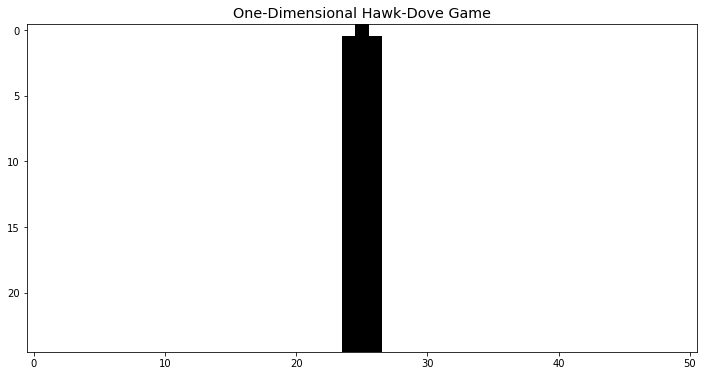

In [4]:
single.init_single()
single.loop()
single.plot_1D()

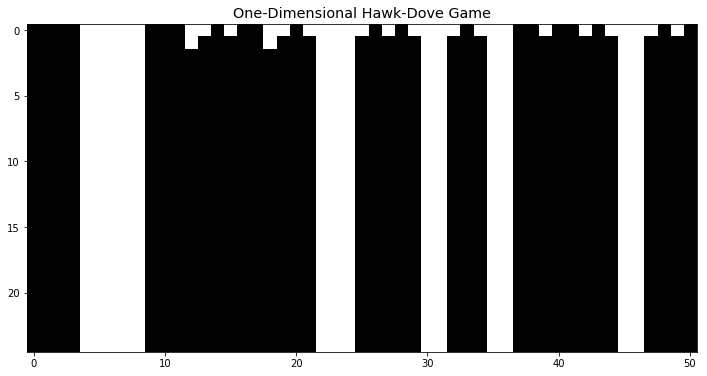

In [5]:
random = HawkDove1D(payoffs, rows)
random.init_random()
random.loop()
random.plot_1D()

The result is a mixed population of hawks and doves, which is a stable equilibrium, just as the replicator dynamics describes. If the value of fighting is greater than the cost, we have a Prisoner's Dilemma and the respective outcome.